# Object Oriented Programming 2 - examples and APIs


## Tasks Today:

   

1) <b>Shopping Cart Example</b> <br>
2) <b>Requests and the pokemon API </b> <br>
 

# Goal 
### build a shopping cart program with prices and quantities using objects and a dictionary

In [ ]:
from IPython.display import clear_output as clear
# Create a class called cart that retains items and has methods to add, remove, and show



# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [ ]:
# making an API call
from pip._vendor import requests

response = requests.get('https://pokeapi.co/api/v2/pokemon/pichu/')

data = response.json()

In [ ]:
# data['height']
data['sprites']

### Display a Pokemon's name, weight, abilities, and types

### Display a Pokemon's name, weight, abilities, and types

In [ ]:
# get the name
data['name']

In [ ]:
# get types
data['types'][0]['type']['name']
data['sprites']['back_default']

In [ ]:
response2 = requests.get('https://pokeapi.co/api/v2/pokemon/garchomp/')

garchomp = response2.json()

In [ ]:
garchomp['types']

In [ ]:
garchomp_types = [p_type['type']['name'] for p_type in garchomp['types']]

In [ ]:
garchomp_types

In [ ]:
# get weight

In [ ]:
# get abilities
response3 = requests.get('https://pokeapi.co/api/v2/pokemon/pikachu/')

pikachu = response3.json()

pikachu['abilities']

pikachu = [p_ability['ability']['name'] for p_ability in pikachu['abilities']]


In [ ]:
pikachu

In [ ]:
# Create a structure for a single pokemon
pokemon = {
    'name': data['name'],
    'types': [p_type['type']['name'] for p_type in data['types']],
    'weight': data['weight'],
    'abilities': [p_abilities['ability']['name'] for p_abilities in data['abilities']]
}

In [ ]:
pokemon

#### Create a function to Pull in your own Pokemon's data 

In [ ]:
def poke_api_call(pokemon):
    from pip._vendor import requests

    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}/')

    data = response.json()

    pokemon = {
    'name': data['name'],
    'types': [p_type['type']['name'] for p_type in data['types']],
    'weight': data['weight'],
    'abilities': [p_abilities['ability']['name'] for p_abilities in data['abilities']]
    }

    return pokemon

In [ ]:
poke_api_call('charmander')

In [ ]:
# What's the name of the pokemon with the ID 421?
pokemon421 = poke_api_call(421)

pokemon421['name']

Choose your pokemon

In [ ]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

print(random_team)

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [ ]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for pokemon in your_team:
    pokemon_stats = poke_api_call(pokemon)

    my_six_pokemon[pokemon.title()] = pokemon_stats

In [ ]:
my_six_pokemon

In [ ]:
random_six_pokemon = {}

for pokemon in your_team:
    pokemone_stats = poke_api_call(pokemon)

    random_six_pokemon[pokemon_stats['name'].title()] = pokemon_stats


In [ ]:
random_six_pokemon

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [ ]:
class Pokemon():
    def __init__(self, name):
        self.name = name.lower()
        self.types = []
        self.weight = None
        self.abilities = []
        self.poke_api_call()

    def poke_api_call(self):
        from pip._vendor import requests

        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')

        data = response.json()

        self.name = data['name']
        self.type = [p_type['type']['name'] for p_type in data['types']]
        self.weight = data['weight']
        self.abilities = [p_abilities['ability']['name'] for p_abilities in data['abilities']]

In [ ]:
charmander = Pokemon('charmander')

In [ ]:
charmander.abilities

### Let's Catch some Pokemon

In [ ]:
class Pokedex:
    def __init__(self, name):
        self.pokemon = {}

    def add_pokemon(self, pokemon):
        self.pokemon[pokemon.name] = pokemon


In [ ]:
encounters = ['pikachu', 'raichu', 'ponyta', 'hitmonlee', 'squirtle', 'wartortle']
pokedex = Pokedex()

for encounter in encounters:
    new_pokemon = Pokemon(encounter)
    pokedex.add_pokemon(new_pokemon)


In [ ]:
pokedex.pokemon

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [ ]:
# Display an image in Jupyter notebook
from IPython.display import Image
import webbrowser
from pip._vendor import requests

# display(Image('https://i.redd.it/45n4mhusa8l41.jpg', width = 300))

class Pokemon():
    def __init__(self, name):
        self.name = name.lower()
        self.types = []
        self.weight = None
        self.abilities = []
        self.sprite = []
        self.poke_api_call()

    def poke_api_call(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        data = response.json()

        self.name = data['name']
        self.type = [p_type['type']['name'] for p_type in data['types']]
        self.sprite = data['sprites']['front_default']
        self.weight = data['weight']
        self.abilities = [p_abilities['ability']['name'] for p_abilities in data['abilities']]
        self.image_url = data['sprites']['other']['official-artwork']['front_default']
        self.species_url = data['species']['url']

    def pokemonImage(self):
        display(Image(str(self.sprite), width = 300))


pikachu = Pokemon('pikachu')
# pikachu.sprite.pokemonImage('pikachu')

In [ ]:
# Calling our new method
pikachu.pokemonImage()


## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [135]:
# Display an image in Jupyter notebook
from re import T
from IPython.display import Image
import webbrowser
from pip._vendor import requests

# display(Image('https://i.redd.it/45n4mhusa8l41.jpg', width = 300))

class Pokemon():
    def __init__(self, name):
        self.name = name.lower()
        self.types = []
        self.weight = None
        self.abilities = []
        self.sprite = []
        self.species_url = None
        self.poke_api_call()

    def poke_api_call(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        data = response.json()
        # print(data['species'])

        self.name = data['name']
        self.type = [p_type['type']['name'] for p_type in data['types']]
        self.sprite = data['sprites']['front_default']
        self.weight = data['weight']
        self.abilities = [p_abilities['ability']['name'] for p_abilities in data['abilities']]
        self.image_url = data['sprites']['other']['official-artwork']['front_default']
        self.pokeid = data['id']
        self.species_url = data['species']['url']

    def pokemonImage(self):
        display(Image(str(self.sprite), width = 300))

    def evolve(self):
        responseSpeciesGet = requests.get(self.species_url)
        species = responseSpeciesGet.json()
        responseEvolution = requests.get(species['evolution_chain']['url'])
        evolutionChain = responseEvolution.json()
        chain = evolutionChain['chain']
        
        normal = chain["species"]["name"]

        evolution = chain['evolves_to'][0]
        evolved = evolution['species']['name']

        if normal == self.name:
            pass
        
        elif evolved == self.name:
            evolved = evolution['evolves_to'][0]['species']['name']
      
        else:
            self.name = self.name.title()
            print(f"{self.name} can't evolve.")
            return

        self.name = evolved
        print('Your Pokemon has evolved!')
        self.poke_api_call()

Your Pokemon has evolved!


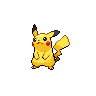

Your Pokemon has evolved!


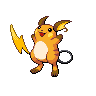

Raichu can't evolve.


In [136]:
pichu = Pokemon('pichu')
pichu.evolve()
pichu.pokemonImage()
pichu.evolve()
pichu.pokemonImage()
pichu.evolve()

Now let's evolve a few

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [195]:
# Display an image in Jupyter notebook
from re import T
from IPython.display import Image
import webbrowser
from pip._vendor import requests

class Move_Tutor:
    def __init__(self):
        self.moveList = []
        self.currentMoves = []

    def showMoves(self):
        print(f"There are {self.name}'s current moves: ")
        for move in self.currentMoves:
            print(move)

    def displayMoves(self):
        print(f"There are {self.name}'s teachable moves: ")
        for move in self.moveList:
            print(move)

    def teachMove(self):
        newMove = input('What move would you like to learn?: ')
        if newMove.lower() not in self.moveList:
            print("That move is not valid.")
            return
        
        elif newMove.lower() == 'quit':
            return

        else:
            self.currentMoves.append(newMove.lower())
            print(f"Added {newMove} to {self.name}'s moves!")


class Pokemon(Move_Tutor):
    def __init__(self, name):
        self.name = name.lower()
        self.types = []
        self.weight = None
        self.abilities = []
        self.sprite = []
        self.species_url = None
        
        super().__init__()

        self.poke_api_call()

    def poke_api_call(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        data = response.json()

        self.name = data['name']
        self.type = [p_type['type']['name'] for p_type in data['types']]
        self.sprite = data['sprites']['front_default']
        self.weight = data['weight']
        self.abilities = [p_abilities['ability']['name'] for p_abilities in data['abilities']]
        self.image_url = data['sprites']['other']['official-artwork']['front_default']
        self.pokeid = data['id']
        self.species_url = data['species']['url']

        moves = data['moves']

        for move in moves:
            self.moveList.append(move['move']['name'])

    def pokemonImage(self):
        display(Image(str(self.sprite), width = 300))

    def evolve(self):
        responseSpeciesGet = requests.get(self.species_url)
        species = responseSpeciesGet.json()
        responseEvolution = requests.get(species['evolution_chain']['url'])
        evolutionChain = responseEvolution.json()
        chain = evolutionChain['chain']
        
        normal = chain["species"]["name"]

        evolution = chain['evolves_to'][0]
        evolved = evolution['species']['name']

        if normal == self.name:
            pass
        
        elif evolved == self.name:
            evolved = evolution['evolves_to'][0]['species']['name']
      
        else:
            self.name = self.name.title()
            print(f"{self.name} can't evolve.")
            return

        self.name = evolved
        print('Your Pokemon has evolved!')
        self.poke_api_call()

    
        


In [196]:
pikachu = Pokemon('pikachu')

In [197]:
pikachu.displayMoves()

There are pikachu's teachable moves
mega-punch
pay-day
thunder-punch
slam
double-kick
mega-kick
headbutt
body-slam
take-down
double-edge
tail-whip
growl
surf
submission
counter
seismic-toss
strength
thunder-shock
thunderbolt
thunder-wave
thunder
dig
toxic
agility
quick-attack
rage
mimic
double-team
defense-curl
light-screen
reflect
bide
swift
skull-bash
flash
rest
substitute
thief
snore
curse
reversal
protect
sweet-kiss
mud-slap
zap-cannon
detect
endure
charm
rollout
swagger
spark
attract
sleep-talk
return
frustration
dynamic-punch
encore
iron-tail
hidden-power
rain-dance
rock-smash
uproar
facade
focus-punch
helping-hand
brick-break
knock-off
secret-power
signal-beam
covet
volt-tackle
calm-mind
shock-wave
natural-gift
feint
fling
magnet-rise
nasty-plot
discharge
captivate
grass-knot
charge-beam
electro-ball
round
echoed-voice
volt-switch
electroweb
wild-charge
draining-kiss
play-rough
play-nice
confide
electric-terrain
nuzzle
laser-focus
rising-voltage


In [198]:
pikachu.teachMove()


That move is not valid


In [199]:
pikachu.showMoves()

There are pikachu's current moves
